# Problem Statement :-

- Financial Analysis is a critical means to assess business performance and the consequences of poor analysis can involve costing billions of dollars to facilitate high-quality time and decision-making professionals such as analysts or investors will perform complex quantity analysis to select information from financial reports and such analysis.
- The sheer volume of financial statements makes it difficult for humans to access and analyze a business's financials. Robust numerical reasoning likewise faces unique challenges in this domain. In this work, we focus on answering deep questions over financial data, aiming to automate the analysis of a large corpus of financial documents. In contrast to existing tasks on general domain, the finance domain includes complex numerical reasoning and understanding of heterogeneous representations. To facilitate analytical progress, we propose a new large-scale dataset, FinQA, with Question-Answering pairs over Financial reports, written by financial experts.
- Here, given Input Data in the form of Structured Tables and Unstructured Text , we need to find out the Solutions as per the Question asked , as per the Mathematical Calculations.
- GITHUB LINK: https://github.com/czyssrs/FinQA/tree/main
- KAGGLE LINK: https://www.kaggle.com/datasets/visalakshiiyer/question-answering-financial-data
- Papers with Code LINK: https://paperswithcode.com/paper/finqa-a-dataset-of-numerical-reasoning-over
- HTML Page for an Example: https://finqasite.github.io/explore.html
- CodaLab Competition Page: https://codalab.lisn.upsaclay.fr/competitions/1846#learn_the_details

# Data Description :-

- Data consists of 4 JSON files: Training Data , Validation Data , Test Data and Private Test Data.
- Each Row in every Dataset provided consists of a specific passage considered from a Financial Report. And the Data is being considered based on the publicly available earnings reports of S&P 500 companies from 1999 to 2019, collected in the FinTabNet dataset.
- Every Row of the JSON Data is represented as shown below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_json('train.json')
df_test = pd.read_json('test.json')
df_dev = pd.read_json('dev.json')
df_ptest = pd.read_json('private_test.json')

**Total Dataset = (Train + Test + Dev / Validation) Datasets**

In [3]:
print(df_train.shape , df_test.shape , df_dev.shape , df_ptest.shape)

(6251, 11) (1147, 11) (883, 11) (919, 7)


In [4]:
round(df_train.shape[0]/8281 * 100,0)

75.0

In [5]:
round(df_test.shape[0]/8281 * 100,0)

14.0

In [6]:
round(df_dev.shape[0]/8281 * 100,0)

11.0

In [7]:
# No Overlapping present between these datasets.

**Details about the Training Data**

In [8]:
df_train.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text               filename  \
0  [fair value of forward exchange contracts afte...   ADI/2009/page_49.pdf   
1  [the remaining unrecognized compensation expen...  ABMD/2012/page_75.pdf   
2  [as of december 31 , 2018 , we did not have an...   AAL/2018/page_13.pdf   
3  [in the third quarter of 2013 , we sold our sh...  INTC/2013/page_71.pdf   
4  [the retail electric price variance is primari...  ETR/2008/page_313.pdf   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa                       id  \
0  {'question': 'what is the the interest expense...   ADI/2009/page_49.pdf-1   
1  {'question': 'during the 2012 year , did the e...  ABMD/2012/page_75.pdf-1   
2  {'question': 'what was the total operating exp...   AAL/2018/page_13.pdf-2   
3  {'question': 'what percentage of total cash an...  INTC/2013/page_71.pdf-4   
4  {'question': 'what is the growth rate in net r...  ETR/2008/page_313.pdf-3   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all  
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...  
1  [{'score': 1.8354555368423462, 'ind': 'text_15...  
2  [{'score': -1.6479225158691402, 'ind': 'text_9...  
3  [{'score': -2.141725540161133, 'ind': 'text_9'...  
4  [{'score': -0.5041980147361751, 'ind': 'text_2...

In [9]:
df_train.tail()

pre_text  \
6246  [a lump sum buyout cost of approximately $ 1.1...   
6247  [item 7 ., management 2019s discussion and ana...   
6248  [notes to consolidated financial statements 20...   
6249  [taxing authorities could challenge our histor...   
6250  [five-year performance comparison 2013 the fol...   

                                              post_text  \
6246  [from time to time , the company is involved i...   
6247  [* corporate special items include gains on tr...   
6248  [average common and common equivalent shares o...   
6249  [in addition to these manufacturing sites , we...   
6250  [[a] total number of shares purchased during t...   

                   filename  \
6246  ABMD/2003/page_27.pdf   
6247    IP/2006/page_19.pdf   
6248   BDX/2016/page_62.pdf   
6249  APTV/2016/page_44.pdf   
6250   UNP/2016/page_21.pdf   

                                              table_ori  \
6246  [[Year ending March 31,, Operating Leases], [2...   
6247  [[<i>In millions</i>, 2006, 2005, 2004], [Indu...   
6248  [[, 2016, 2015, 2014], [Average common shares ...   
6249  [[, North America, Europe,Middle East& Africa,...   
6250  [[Period, Total Number of Shares Purchased [a]...   

                                                  table  \
6246  [[year ending march 31,, operating leases], [2...   
6247  [[in millions, 2006, 2005, 2004], [industry se...   
6248  [[, 2016, 2015, 2014], [average common shares ...   
6249  [[, north america, europemiddle east& africa, ...   
6250  [[period, total number of shares purchased [a]...   

                                                     qa  \
6246  {'question': 'what portion of total future min...   
6247  {'question': 'what was the ratio of the debt r...   
6248  {'question': 'what is the mathematical range o...   
6249  {'question': 'what is the percentage of powert...   
6250  {'question': 'what percentage of the total num...   

                           id  \
6246  ABMD/2003/page_27.pdf-4   
6247    IP/2006/page_19.pdf-4   
6248   BDX/2016/page_62.pdf-3   
6249  APTV/2016/page_44.pdf-4   
6250   UNP/2016/page_21.pdf-4   

                                        table_retrieved  \
6246  [{'score': 2.879740476608276, 'ind': 'table_7'...   
6247                                                 []   
6248  [{'score': 2.8568873405456543, 'ind': 'table_2...   
6249  [{'score': 2.456819057464599, 'ind': 'table_2'...   
6250  [{'score': 2.157913208007812, 'ind': 'table_4'...   

                                         text_retrieved  \
6246                                                 []   
6247  [{'score': 0.5998180508613581, 'ind': 'text_17...   
6248  [{'score': 0.401287794113159, 'ind': 'text_4'}...   
6249  [{'score': -0.111119545996189, 'ind': 'text_16...   
6250    [{'score': 0.436806112527847, 'ind': 'text_3'}]   

                                    table_retrieved_all  \
6246  [{'score': 2.879740476608276, 'ind': 'table_7'...   
6247  [{'score': -1.377293109893798, 'ind': 'table_8...   
6248  [{'score': 2.8568873405456543, 'ind': 'table_2...   
6249  [{'score': 2.456819057464599, 'ind': 'table_2'...   
6250  [{'score': 2.157913208007812, 'ind': 'table_4'...   

                                     text_retrieved_all  
6246  [{'score': 0.31040185689926103, 'ind': 'text_4...  
6247  [{'score': 0.5998180508613581, 'ind': 'text_17...  
6248  [{'score': 0.401287794113159, 'ind': 'text_4'}...  
6249  [{'score': -0.111119545996189, 'ind': 'text_16...  
6250  [{'score': 0.436806112527847, 'ind': 'text_3'}...

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pre_text             6251 non-null   object
 1   post_text            6251 non-null   object
 2   filename             6251 non-null   object
 3   table_ori            6251 non-null   object
 4   table                6251 non-null   object
 5   qa                   6251 non-null   object
 6   id                   6251 non-null   object
 7   table_retrieved      6251 non-null   object
 8   text_retrieved       6251 non-null   object
 9   table_retrieved_all  6251 non-null   object
 10  text_retrieved_all   6251 non-null   object
dtypes: object(11)
memory usage: 537.3+ KB


<Axes: >

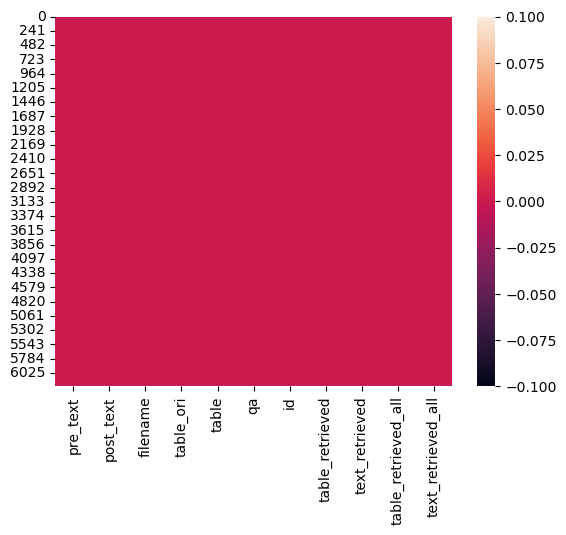

In [11]:
sns.heatmap(df_train.isna() , cbar = True)

<Axes: >

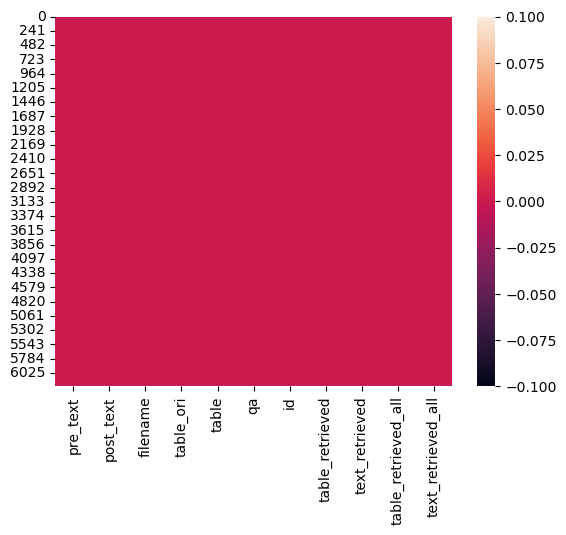

In [12]:
sns.heatmap(df_train.isnull() , cbar = True)

In [13]:
df_train.describe(include = 'all')

pre_text post_text              filename  \
count      6251      6251                  6251   
unique     2090      1862                  2110   
top         [.]       [.]  CME/2017/page_83.pdf   
freq         20       639                     6   

                                                table_ori  \
count                                                6251   
unique                                               2098   
top     [[Current assets, $1,922], [Long-term assets, ...   
freq                                                    9   

                                                    table  \
count                                                6251   
unique                                               2097   
top     [[current assets, $ 1922], [long-term assets, ...   
freq                                                    9   

                                                       qa  \
count                                                6251   
unique                                               6203   
top     {'question': 'what percent did purchase issuan...   
freq                                                    2   

                            id table_retrieved text_retrieved  \
count                     6251            6251           6251   
unique                    6251            5758           5580   
top     ADI/2009/page_49.pdf-1              []             []   
freq                         1             440            620   

                                      table_retrieved_all  \
count                                                6251   
unique                                               6192   
top     [{'score': -0.5908989310264581, 'ind': 'table_...   
freq                                                    2   

                                       text_retrieved_all  
count                                                6251  
unique                                               6194  
top     [{'score': 2.742092132568359, 'ind': 'text_17'...  
freq                                                    2

**Details about the Test Data**

In [14]:
df_test.head()

pre_text  \
0  [entergy corporation and subsidiaries manageme...   
1  [item 1b ., unresolved staff comments not appl...   
2  [undesignated hedges was $ 41.2 million and $ ...   
3  [chairman and a director of the board of fis a...   
4  [performance graph the table below compares th...   

                                           post_text               filename  \
0  [the retail electric price variance is primari...   ETR/2016/page_23.pdf   
1  [1 leases on portions of the land used for the...  INTC/2015/page_41.pdf   
2  [the amounts earned and owed under the swap ag...   ADI/2011/page_61.pdf   
3  [we recorded a preliminary allocation of the p...   FIS/2010/page_70.pdf   
4  [$ 50.00 $ 100.00 $ 150.00 $ 200.00 $ 250.00 $...   MAS/2017/page_27.pdf   

                                           table_ori  \
0  [[, Amount (In Millions)], [2014 net revenue, ...   
1  [[(Square Feet in Millions), UnitedStates, Oth...   
2  [[Statement of Income, October 29, 2011, Octob...   
3  [[Value of Metavante common stock, $4,066.4], ...   
4  [[, 2013, 2014, 2015, 2016, 2017], [Masco, $13...   

                                               table  \
0  [[, amount ( in millions )], [2014 net revenue...   
1  [[( square feet in millions ), unitedstates, o...   
2  [[statement of income classification, statemen...   
3  [[value of metavante common stock, $ 4066.4], ...   
4  [[, 2013, 2014, 2015, 2016, 2017], [masco, $ 1...   

                                                  qa                       id  \
0  {'question': 'what is the net change in net re...   ETR/2016/page_23.pdf-2   
1  {'question': 'what percentage of total facilit...  INTC/2015/page_41.pdf-4   
2  {'question': 'what is the percentage change in...   ADI/2011/page_61.pdf-2   
3  {'question': 'what portion of total purchase p...   FIS/2010/page_70.pdf-2   
4  {'question': 'what was the difference in perce...   MAS/2017/page_27.pdf-2   

                                     table_retrieved  \
0  [{'score': 3.04259443283081, 'ind': 'table_8'}...   
1  [{'score': 2.779884576797485, 'ind': 'table_3'...   
2                                                 []   
3  [{'score': 2.479019165039062, 'ind': 'table_2'...   
4  [{'score': 2.594181537628174, 'ind': 'table_2'...   

                                      text_retrieved  \
0  [{'score': 0.39621862769126803, 'ind': 'text_1...   
1  [{'score': -0.8847692608833311, 'ind': 'text_3...   
2  [{'score': -0.08387626707553801, 'ind': 'text_...   
3  [{'score': -1.799529433250427, 'ind': 'text_21...   
4  [{'score': 1.054290175437927, 'ind': 'text_1'}...   

                                 table_retrieved_all  \
0  [{'score': 3.04259443283081, 'ind': 'table_8'}...   
1  [{'score': 2.779884576797485, 'ind': 'table_3'...   
2  [{'score': -2.742973804473877, 'ind': 'table_1...   
3  [{'score': 2.479019165039062, 'ind': 'table_2'...   
4  [{'score': 2.594181537628174, 'ind': 'table_2'...   

                                  text_retrieved_all  
0  [{'score': 0.39621862769126803, 'ind': 'text_1...  
1  [{'score': -0.8847692608833311, 'ind': 'text_3...  
2  [{'score': -0.08387626707553801, 'ind': 'text_...  
3  [{'score': -1.799529433250427, 'ind': 'text_21...  
4  [{'score': 1.054290175437927, 'ind': 'text_1'}...

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pre_text             1147 non-null   object
 1   post_text            1147 non-null   object
 2   filename             1147 non-null   object
 3   table_ori            1147 non-null   object
 4   table                1147 non-null   object
 5   qa                   1147 non-null   object
 6   id                   1147 non-null   object
 7   table_retrieved      1147 non-null   object
 8   text_retrieved       1147 non-null   object
 9   table_retrieved_all  1147 non-null   object
 10  text_retrieved_all   1147 non-null   object
dtypes: object(11)
memory usage: 98.7+ KB


<Axes: >

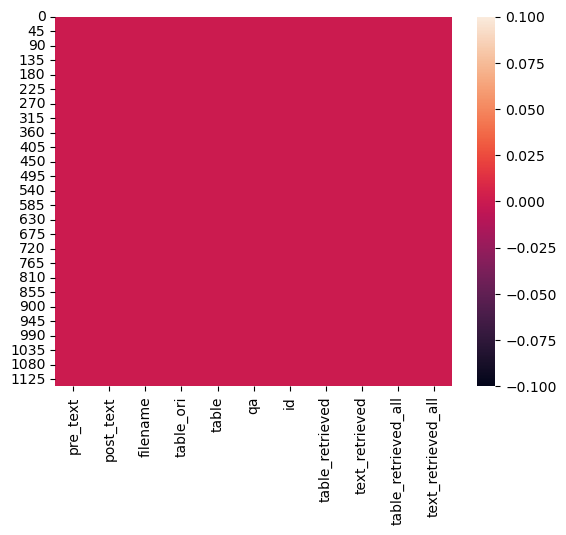

In [16]:
sns.heatmap(df_test.isna() , cbar = True)

<Axes: >

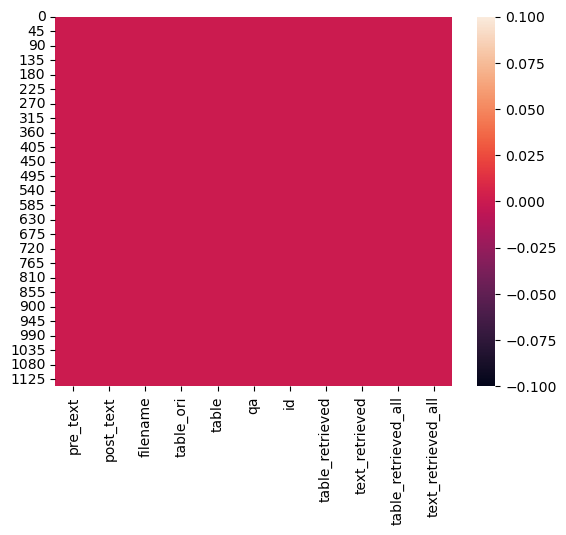

In [17]:
sns.heatmap(df_test.isnull() , cbar = True)

In [18]:
df_test.describe(include = 'all')

pre_text post_text              filename  \
count      1147      1147                  1147   
unique      377       346                   380   
top         [.]       [.]  JPM/2018/page_90.pdf   
freq          9       100                     6   

                                                table_ori  \
count                                                1147   
unique                                                379   
top     [[Year ended December 31,(in millions, except ...   
freq                                                    6   

                                                    table  \
count                                                1147   
unique                                                379   
top     [[year ended december 31 ( in millions except ...   
freq                                                    6   

                                                       qa  \
count                                                1147   
unique                                               1138   
top     {'question': 'what is the percentage increase ...   
freq                                                    2   

                            id table_retrieved text_retrieved  \
count                     1147            1147           1147   
unique                    1147            1050           1029   
top     ETR/2016/page_23.pdf-2              []             []   
freq                         1              90            111   

                                      table_retrieved_all  \
count                                                1147   
unique                                               1138   
top     [{'score': 2.797855854034424, 'ind': 'table_3'...   
freq                                                    2   

                                       text_retrieved_all  
count                                                1147  
unique                                               1138  
top     [{'score': -0.5163664221763611, 'ind': 'text_1...  
freq                                                    2

**Details about the Validation Data**

In [19]:
df_dev.head()

pre_text  \
0  [largest operators of open-loop and closed-loo...   
1  [performance graph comparison of five-year cum...   
2  [the acquisition date is on or after the begin...   
3  [entergy mississippi , inc ., management 2019s...   
4  [entergy louisiana , inc ., management's finan...   

                                           post_text               filename  \
0  [( 1 ) visa inc ., figures as reported previou...     V/2008/page_17.pdf   
1                                                [.]    C/2017/page_328.pdf   
2                                                [.]   DVN/2007/page_58.pdf   
3  [the volume/weather variance is primarily due ...  ETR/2011/page_341.pdf   
4  [the deferred fuel cost revisions variance res...  ETR/2004/page_213.pdf   

                                           table_ori  \
0  [[Company, Payments Volume  (billions), Total ...   
1  [[DATE, CITI, S&P 500, S&P FINANCIALS], [31-De...   
2  [[, Oil   (MMBbls), Gas   (Bcf), NGLs   (MMBbl...   
3  [[, Amount (In Millions)], [2009 net revenue, ...   
4  [[, (In Millions)], [2002 net revenue, $922.9]...   

                                               table  \
0  [[company, payments volume ( billions ), total...   
1  [[date, citi, s&p 500, s&p financials], [31-de...   
2  [[, oil ( mmbbls ), gas ( bcf ), ngls ( mmbbls...   
3  [[, amount ( in millions )], [2009 net revenue...   
4  [[, ( in millions )], [2002 net revenue, $ 922...   

                                                  qa                       id  \
0  {'question': 'what is the average payment volu...     V/2008/page_17.pdf-1   
1  {'question': 'what was the percentage cumulati...    C/2017/page_328.pdf-1   
2  {'question': 'what percentage of the total oil...   DVN/2007/page_58.pdf-2   
3  {'question': 'in 2010 what was the net change ...  ETR/2011/page_341.pdf-3   
4  {'question': 'what are the deferred fuel cost ...  ETR/2004/page_213.pdf-2   

                                     table_retrieved  \
0  [{'score': 3.21082329750061, 'ind': 'table_3'}...   
1  [{'score': 2.015230894088745, 'ind': 'table_6'...   
2  [{'score': 2.836086988449096, 'ind': 'table_3'...   
3  [{'score': 2.8697516918182373, 'ind': 'table_4...   
4   [{'score': 2.318804502487182, 'ind': 'table_2'}]   

                                      text_retrieved  \
0  [{'score': -1.715970516204834, 'ind': 'text_43...   
1   [{'score': 0.8624499440193171, 'ind': 'text_1'}]   
2                                                 []   
3  [{'score': 0.28362259268760603, 'ind': 'text_3'}]   
4  [{'score': 0.695305705070495, 'ind': 'text_6'}...   

                                 table_retrieved_all  \
0  [{'score': 3.21082329750061, 'ind': 'table_3'}...   
1  [{'score': 2.015230894088745, 'ind': 'table_6'...   
2  [{'score': 2.836086988449096, 'ind': 'table_3'...   
3  [{'score': 2.8697516918182373, 'ind': 'table_4...   
4  [{'score': 2.318804502487182, 'ind': 'table_2'...   

                                  text_retrieved_all  
0  [{'score': -1.715970516204834, 'ind': 'text_43...  
1  [{'score': 0.8624499440193171, 'ind': 'text_1'...  
2  [{'score': 0.065325163304805, 'ind': 'text_21'...  
3  [{'score': 0.28362259268760603, 'ind': 'text_3...  
4  [{'score': 0.695305705070495, 'ind': 'text_6'}...

In [20]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pre_text             883 non-null    object
 1   post_text            883 non-null    object
 2   filename             883 non-null    object
 3   table_ori            883 non-null    object
 4   table                883 non-null    object
 5   qa                   883 non-null    object
 6   id                   883 non-null    object
 7   table_retrieved      883 non-null    object
 8   text_retrieved       883 non-null    object
 9   table_retrieved_all  883 non-null    object
 10  text_retrieved_all   883 non-null    object
dtypes: object(11)
memory usage: 76.0+ KB


<Axes: >

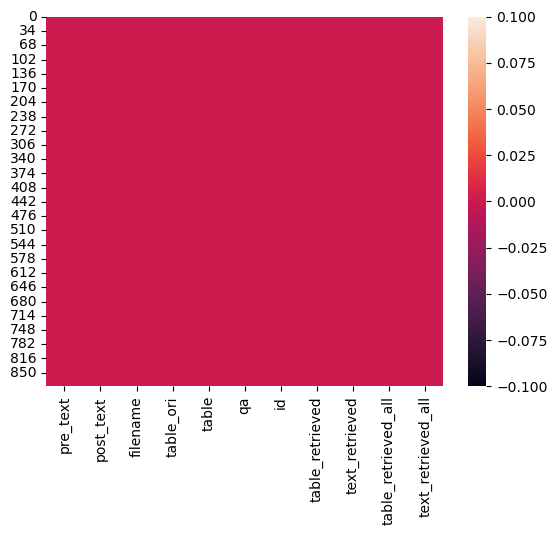

In [21]:
sns.heatmap(df_dev.isna() , cbar = True)

<Axes: >

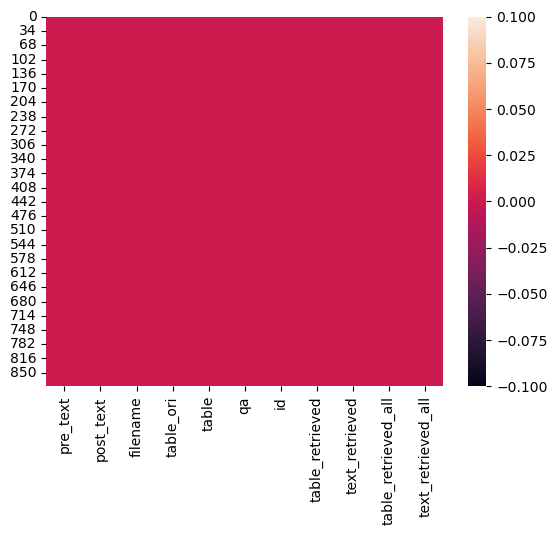

In [22]:
sns.heatmap(df_dev.isnull() , cbar = True)

In [23]:
df_dev.describe(include = 'all')

pre_text post_text  \
count                                                 883       883   
unique                                                299       264   
top     [management 2019s discussion and analysis 78 j...       [.]   
freq                                                    5       107   

                     filename  \
count                     883   
unique                    299   
top     JPM/2018/page_110.pdf   
freq                        5   

                                                table_ori  \
count                                                 883   
unique                                                299   
top     [[As of or for the year ended December 31, (in...   
freq                                                    5   

                                                    table  \
count                                                 883   
unique                                                299   
top     [[as of or for the year ended december 31 ( in...   
freq                                                    5   

                                                       qa  \
count                                                 883   
unique                                                877   
top     {'question': 'what was average net sales for s...   
freq                                                    2   

                          id table_retrieved text_retrieved  \
count                    883             883            883   
unique                   883             830            778   
top     V/2008/page_17.pdf-1              []             []   
freq                       1              47            101   

                                      table_retrieved_all  \
count                                                 883   
unique                                                876   
top     [{'score': -1.324357748031616, 'ind': 'table_8...   
freq                                                    2   

                                       text_retrieved_all  
count                                                 883  
unique                                                876  
top     [{'score': 1.957584023475647, 'ind': 'text_24'...  
freq                                                    2

In [24]:
df = pd.concat([df_train, df_test, df_dev])
df.describe()

pre_text post_text               filename  \
count      8281      8281                   8281   
unique     2753      2458                   2789   
top         [.]       [.]  SLG/2017/page_114.pdf   
freq         29       846                      6   

                                                table_ori  \
count                                                8281   
unique                                               2768   
top     [[Land improvements, 20], [Buildings, 39-40], ...   
freq                                                   11   

                                                    table  \
count                                                8281   
unique                                               2766   
top     [[land improvements, 20], [buildings, 39-40], ...   
freq                                                   11   

                                                       qa  \
count                                                8281   
unique                                               8218   
top     {'question': 'what is the number of shares out...   
freq                                                    2   

                            id table_retrieved text_retrieved  \
count                     8281            8281           8281   
unique                    8281            7634           7385   
top     ADI/2009/page_49.pdf-1              []             []   
freq                         1             577            832   

                                      table_retrieved_all  \
count                                                8281   
unique                                               8202   
top     [{'score': 1.317626476287841, 'ind': 'table_7'...   
freq                                                    2   

                                       text_retrieved_all  
count                                                8281  
unique                                               8208  
top     [{'score': 1.174071311950683, 'ind': 'text_6'}...  
freq                                                    2

The Filename Syntax consists of the following:
- Stock Ticker Symbols for the publicly traded companies on stock exchanges.
- The Year of Report
- The Page Number from which the Report has been referred.

In [25]:
df[['Company Name', 'Year of Publication', 'Page_Number']] = df['filename'].str.split('/', expand=True)
df['Page_Number'] = df['Page_Number'].str.split('_').str[1].str.replace('.pdf', '')
df = df.drop(columns=['filename','id'])
df['Year of Publication'] = df['Year of Publication'].astype(int)
df['Page_Number'] = df['Page_Number'].astype(int)

In [26]:
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number  
0                 2009           49  
1                 2012           75  
2                 2018           13  
3                 2013           71  
4                 2008          313

In [27]:
# Retain only alphabets and braces using regular expressions

df['Operations'] = df['qa'].apply(lambda x: x['program'])
df['Operations'] = df['Operations'].str.replace(r'\([\w\d_]+\)', '', regex=True)

In [28]:
import re

# Define regex pattern for content inside braces
pattern = r'\(.*?\)'

# Function to remove content inside braces
def remove_content_inside_braces(input_str):
    return re.sub(pattern, '', input_str)

In [29]:
df['Operations'] = df['Operations'].apply(remove_content_inside_braces)
df['Number of Operations'] = df['Operations'].str.split(',').str.len()
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number                             Operations  \
0                 2009           49                         divide, divide   
1                 2012           75  multiply, multiply, multiply, greater   
2                 2018           13                                 divide   
3                 2013           71                                 divide   
4                 2008          313                       subtract, divide   

   Number of Operations  
0                     2  
1                     4  
2                     1  
3                     1  
4                     2

In [30]:
number_of_operations_value_counts_normalized = round(df['Operations'].str.split(',').str.len().
                                                     value_counts(ascending = False, normalize = True)* 100,2)
number_of_operations_value_counts_normalized

1    59.10
2    32.71
3     5.18
5     1.51
4     1.42
6     0.07
Name: Operations, dtype: float64

In [31]:
pie_data = pd.DataFrame({'Number of Operations': number_of_operations_value_counts_normalized.index,
                         'Percentage': number_of_operations_value_counts_normalized.values})

fig = px.pie(pie_data, values = 'Percentage', names = 'Number of Operations', 
             title='Percentage Distribution of the Number of Operations required to answer the Financial Question')
fig.show()

In [32]:
from collections import Counter

all_text = ','.join(df['Operations'])
individual_words = all_text.split(',')
words_without_spaces = [word.replace(" ", "") for word in individual_words]
word_counts = Counter(words_without_spaces)
word_counts

Counter({'divide': 5901,
         'multiply': 759,
         'greater': 154,
         'subtract': 3676,
         'add': 1952,
         'table_average': 129,
         'table_max': 66,
         'table_min': 36,
         'table_sum': 50,
         'exp': 9})

In [33]:
# Calculate the total count of all words
total_count = sum(word_counts.values())

# Calculate the percentage contribution of each word
word_percentages_operations = {word: round((count / total_count) * 100,2) for word, count in word_counts.items()}

for word, percentage in word_percentages_operations.items():
    print(f"Percentage Contribution of {word} : {percentage:.2f}%")

Percentage Contribution of divide : 46.35%
Percentage Contribution of multiply : 5.96%
Percentage Contribution of greater : 1.21%
Percentage Contribution of subtract : 28.87%
Percentage Contribution of add : 15.33%
Percentage Contribution of table_average : 1.01%
Percentage Contribution of table_max : 0.52%
Percentage Contribution of table_min : 0.28%
Percentage Contribution of table_sum : 0.39%
Percentage Contribution of exp : 0.07%


In [34]:
pie_data = pd.DataFrame({'Operations': list(word_percentages_operations.keys()),
                         'Percentage': list(word_percentages_operations.values())})
fig = px.pie(pie_data, values='Percentage', names='Operations',
             title='Percentage Distribution of the Operations used to answer the Financial Questions')
fig.show()

In [35]:
z = df['Year of Publication'].value_counts(ascending = False)
z

2017    737
2012    670
2015    644
2013    643
2018    640
2008    638
2016    616
2014    554
2009    542
2010    489
2011    476
2007    468
2006    383
2005    204
2004    193
2003    149
2002     93
2019     81
2001     50
1999      7
2000      4
Name: Year of Publication, dtype: int64

In [36]:
fig = px.bar(z, x=z.index, y=z.values)
fig.update_layout(title="Bar Chart for Publication Years of the Reports")
fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Frequency")
fig.show()

<Axes: xlabel='count', ylabel='Year of Publication'>

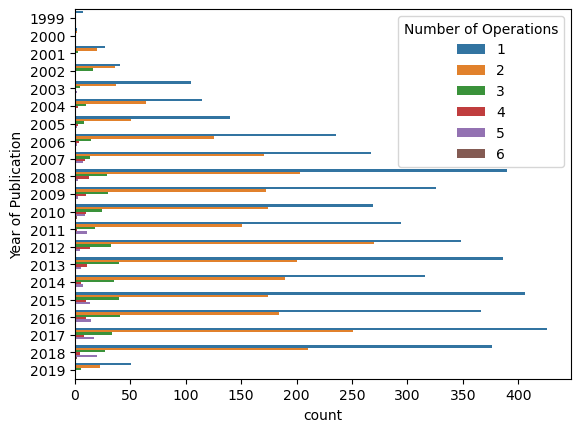

In [37]:
sns.countplot(y='Year of Publication', hue='Number of Operations', data=df)

In [38]:
y = df['Page_Number'].value_counts(ascending = False)
print(df['Page_Number'].nunique())
y

301


83     125
35     108
31     106
46     103
32     102
      ... 
196      2
249      2
2        1
321      1
332      1
Name: Page_Number, Length: 301, dtype: int64

In [39]:
fig = px.bar(y, x=y.index, y=y.values)
fig.update_layout(title="Bar Chart for Page Numbers of the Reports")
fig.update_xaxes(title_text="Page Numbers from where the Contexts are chosen")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [40]:
x = df['Company Name'].value_counts(ascending = False)
x

ETR     472
UNP     389
JPM     293
AMT     283
GS      267
       ... 
CCI       3
TXN       3
EXR       2
NTAP      2
CNP       2
Name: Company Name, Length: 137, dtype: int64

In [41]:
fig = px.bar(x, x=x.index, y=x.values)
fig.update_layout(title="Bar Chart for Frequency of Companies in the Reports")
fig.update_xaxes(title_text="Companies")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [42]:
df['Supporting Facts'] = df['qa'].apply(lambda x: x['gold_inds'])

In [43]:
def dict_length(d):
    return len(d)

In [44]:
df['Number of Facts'] = df['Supporting Facts'].apply(lambda x: dict_length(x))
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number                             Operations  \
0                 2009           49                         divide, divide   
1                 2012           75  multiply, multiply, multiply, greater   
2                 2018           13                                 divide   
3                 2013           71                                 divide   
4                 2008          313                       subtract, divide   

   Number of Operations                                   Supporting Facts  \
0                     2  {'text_1': 'if libor changes by 100 basis poin...   
1                     4  {'table_2': 'the granted of number of shares (...   
2                     1  {'table_1': 'year the 2018 of gallons is 4447 ...   
3                     1  {'table_1': '( in millions ) the available-for...   
4                     2  {'table_1': 'the 2007 net revenue of amount ( ...

In [45]:
number_of_facts_value_counts_normalized = round(df['Number of Facts'].value_counts(ascending = False,normalize = True)*100,2)
number_of_facts_value_counts_normalized

1    46.30
2    42.63
3     7.45
4     2.55
5     0.56
6     0.31
7     0.11
9     0.07
8     0.02
Name: Number of Facts, dtype: float64

In [46]:
pie_data = pd.DataFrame({'Number of Facts': number_of_facts_value_counts_normalized.index,
                         'Percentage': number_of_facts_value_counts_normalized.values})

fig = px.pie(pie_data, values = 'Percentage', names = 'Number of Facts', 
             title='Number of Gold Supporting Facts required to answer the Financial Question')
fig.show()

In [47]:
def extract_keys(d):
    return list(d.keys())

In [48]:
df['Rows from Text or Table'] = df['Supporting Facts'].apply(lambda x: extract_keys(x))
df['Rows from Text or Table'] = df['Rows from Text or Table'].apply(lambda x: ','.join(map(str, x)))
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number                             Operations  \
0                 2009           49                         divide, divide   
1                 2012           75  multiply, multiply, multiply, greater   
2                 2018           13                                 divide   
3                 2013           71                                 divide   
4                 2008          313                       subtract, divide   

   Number of Operations                                   Supporting Facts  \
0                     2  {'text_1': 'if libor changes by 100 basis poin...   
1                     4  {'table_2': 'the granted of number of shares (...   
2                     1  {'table_1': 'year the 2018 of gallons is 4447 ...   
3                     1  {'table_1': '( in millions ) the available-for...   
4                     2  {'table_1': 'the 2007 net revenue of amount ( ...

In [49]:
df['Rows from Text or Table'].nunique()

1286

In [50]:
from collections import Counter

all_text_Text_Table = ','.join(df['Rows from Text or Table'])
individual_words = all_text_Text_Table.split(',')
words_without_spaces = [word.replace(" ", "") for word in individual_words]
word_counts = Counter(words_without_spaces)
word_counts_sorted_by_values = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
word_counts_sorted_by_values

[('table_1', 3010),
 ('table_2', 1752),
 ('table_3', 1312),
 ('table_4', 1048),
 ('table_5', 769),
 ('table_6', 684),
 ('table_7', 555),
 ('table_8', 311),
 ('text_2', 281),
 ('text_3', 267),
 ('text_1', 249),
 ('text_4', 226),
 ('text_5', 219),
 ('text_6', 201),
 ('table_9', 200),
 ('text_12', 193),
 ('text_9', 193),
 ('text_8', 190),
 ('text_0', 179),
 ('text_13', 168),
 ('text_10', 159),
 ('text_7', 156),
 ('text_11', 150),
 ('text_14', 138),
 ('text_16', 112),
 ('text_15', 104),
 ('text_17', 103),
 ('text_18', 102),
 ('text_20', 100),
 ('text_19', 100),
 ('text_21', 74),
 ('text_22', 66),
 ('text_23', 61),
 ('table_11', 57),
 ('table_0', 56),
 ('table_10', 55),
 ('text_25', 50),
 ('text_24', 49),
 ('text_26', 40),
 ('text_28', 34),
 ('text_27', 30),
 ('text_29', 29),
 ('table_12', 24),
 ('text_30', 23),
 ('table_13', 23),
 ('text_31', 22),
 ('text_32', 14),
 ('table_14', 14),
 ('text_34', 13),
 ('text_35', 13),
 ('table_17', 12),
 ('text_37', 10),
 ('table_15', 8),
 ('text_40', 8),

In [51]:
# Calculate the total count of all words
total_count_text_tables = sum(word_counts.values())

# Calculate the percentage contribution of each word
word_percentages = {word: (count / total_count_text_tables) * 100 for word, count in word_counts.items()}

for word, percentage in word_percentages.items():
    print(f"Percentage Contribution of {word} : {percentage:.2f}%")

Percentage Contribution of text_1 : 1.76%
Percentage Contribution of table_2 : 12.42%
Percentage Contribution of text_15 : 0.74%
Percentage Contribution of table_1 : 21.34%
Percentage Contribution of table_8 : 2.20%
Percentage Contribution of table_6 : 4.85%
Percentage Contribution of text_0 : 1.27%
Percentage Contribution of table_15 : 0.06%
Percentage Contribution of text_7 : 1.11%
Percentage Contribution of table_3 : 9.30%
Percentage Contribution of text_4 : 1.60%
Percentage Contribution of table_7 : 3.93%
Percentage Contribution of text_5 : 1.55%
Percentage Contribution of table_4 : 7.43%
Percentage Contribution of text_10 : 1.13%
Percentage Contribution of text_12 : 1.37%
Percentage Contribution of text_17 : 0.73%
Percentage Contribution of text_9 : 1.37%
Percentage Contribution of text_11 : 1.06%
Percentage Contribution of text_14 : 0.98%
Percentage Contribution of text_16 : 0.79%
Percentage Contribution of text_6 : 1.42%
Percentage Contribution of table_5 : 5.45%
Percentage Cont

- For Tables, the fact which is being used the most is "table_1", with usage of 21.34%.
- For Texts, the fact which is being used the most is "text_2", with usage of 1.99%.

In [52]:
df['Text or Table'] = df['Rows from Text or Table'].str.replace(r'_\d', '', regex=True)
df['Text or Table'] = df['Text or Table'].str.replace(r'text\d+', 'text', regex=True)
df['Text or Table'] = df['Text or Table'].str.replace(r'table\d+', 'table', regex=True)
df['Text or Table'] = df['Text or Table'].str.replace(r'_-1$', '', regex=True)
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number                             Operations  \
0                 2009           49                         divide, divide   
1                 2012           75  multiply, multiply, multiply, greater   
2                 2018           13                                 divide   
3                 2013           71                                 divide   
4                 2008          313                       subtract, divide   

   Number of Operations                                   Supporting Facts  \
0                     2  {'text_1': 'if libor changes by 100 basis poin...   
1                     4  {'table_2': 'the granted of number of shares (...   
2                     1  {'table_1': 'year the 2018 of gallons is 4447 ...   
3                     1  {'table_1': '( in millions ) the available-for...   
4                     2  {'table_1': 'the 2007 net revenue of amount ( ...

In [53]:
df['Text or Table'].unique()

array(['text', 'table,text', 'table', 'table,table', 'text,text',
       'text,text,table,table', 'table,table,text,text,text',
       'table,table,table,text,text', 'table,table,text',
       'table,text,table', 'text,table', 'table,table,table',
       'text,text,text,table', 'text,text,text', 'text,text,text,text',
       'table,text,text', 'table,table,table,table,table',
       'text,table,table', 'table,table,table,text',
       'table,table,table,table', 'table,table,table,table,table,table',
       'table,table,table,table,table,table,text,text,text',
       'table,table,text,table,table',
       'table,table,table,table,table,text', 'table,table,text,text',
       'text,table,text', 'table,text,text,text,text,text',
       'table,table,text,table', 'table,text,table,text',
       'text,text,table', 'table,text,table,table,table',
       'table,text,text,text', 'table,text,text,table',
       'text,table,table,text', 'table,table,table,table,text',
       'text,table,table,tabl

In [54]:
from collections import Counter

all_text_Text_or_Table = ','.join(df['Text or Table'])
individual_words = all_text_Text_or_Table.split(',')
words_without_spaces = [word.replace(" ", "") for word in individual_words]
word_counts = Counter(words_without_spaces)
word_counts

Counter({'text': 4207, 'table': 9901})

In [55]:
# Calculate the total count of all words
total_count_text_or_tables = sum(word_counts.values())

# Calculate the percentage contribution of each word
word_percentages = {word: (count / total_count_text_or_tables) * 100 for word, count in word_counts.items()}

for word, percentage in word_percentages.items():
    print(f"Percentage Contribution of {word} : {percentage:.2f}%")

Percentage Contribution of text : 29.82%
Percentage Contribution of table : 70.18%


In [56]:
def find_unique_words(sentence):
    # Split the sentence into words
    words = sentence.split(',')
    # Use a set to store unique words
    unique_words = set(words)
    return unique_words

In [57]:
string_counts = Counter(df['Text or Table'])

# Print the counts
for string, count in string_counts.items():
    x = find_unique_words(string)
    print(f"{x}: {round(count/len(df['Text or Table'])*100,2)}")

{'text'}: 15.71
{'table', 'text'}: 6.59
{'table'}: 30.59
{'table'}: 28.51
{'text'}: 6.58
{'table', 'text'}: 0.18
{'table', 'text'}: 0.07
{'table', 'text'}: 0.08
{'table', 'text'}: 2.09
{'table', 'text'}: 0.28
{'table', 'text'}: 0.94
{'table'}: 2.31
{'table', 'text'}: 0.02
{'text'}: 0.64
{'text'}: 0.43
{'table', 'text'}: 1.58
{'table'}: 0.23
{'table', 'text'}: 0.25
{'table', 'text'}: 0.59
{'table'}: 0.66
{'table'}: 0.12
{'table', 'text'}: 0.02
{'table', 'text'}: 0.02
{'table', 'text'}: 0.06
{'table', 'text'}: 0.27
{'table', 'text'}: 0.12
{'table', 'text'}: 0.04
{'table', 'text'}: 0.05
{'table', 'text'}: 0.02
{'table', 'text'}: 0.18
{'table', 'text'}: 0.01
{'table', 'text'}: 0.23
{'table', 'text'}: 0.06
{'table', 'text'}: 0.01
{'table', 'text'}: 0.08
{'table', 'text'}: 0.01
{'table', 'text'}: 0.06
{'text'}: 0.02
{'table', 'text'}: 0.01
{'table', 'text'}: 0.08
{'text'}: 0.01
{'table', 'text'}: 0.02
{'table'}: 0.01
{'table', 'text'}: 0.01
{'table', 'text'}: 0.01
{'table', 'text'}: 0.01
{'t

In [58]:
from collections import Counter

# Your code to calculate counts and percentages
string_counts = Counter(df['Text or Table'])

# Create a dictionary to store summed percentages for each unique category
summed_percentages = {}

# Iterate over the counts and percentages
for string, count in string_counts.items():
    x = find_unique_words(string)
    category = frozenset(x)
    percentage = round(count / len(df['Text or Table']) * 100, 2)
    # Add percentage to existing category or initialize with 0 if new category
    summed_percentages[category] = summed_percentages.get(category, 0) + percentage

# Print the summed percentages
for category, percentage_sum in summed_percentages.items():
    print(f"{category}: {round(percentage_sum,2)}%")

frozenset({'text'}): 23.4%
frozenset({'table', 'text'}): 14.09%
frozenset({'table'}): 62.43%


In [59]:
data = {
    'Text only': 23.4,
    'Both Text and Table': 14.09,
    'Table only': 62.43
}

dx = pd.DataFrame(list(data.items()), columns=['Data considered while getting the Answer', 'Percentage'])
fig = px.pie(dx, names='Data considered while getting the Answer', values='Percentage', 
             title='Percentage Distribution for Data considered while solving from Context having both Texts and Tables')
fig.show()

In [60]:
df['Model Input'] = df['qa'].apply(lambda x: x['model_input'])
df['Number of Model Inputs'] = df['Model Input'].apply(lambda x: dict_length(x)).astype(int)
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR   

   Year of Publication  Page_Number                             Operations  \
0                 2009           49                         divide, divide   
1                 2012           75  multiply, multiply, multiply, greater   
2                 2018           13                                 divide   
3                 2013           71                                 divide   
4                 2008          313                       subtract, divide   

   Number of Operations                                   Supporting Facts  \
0                     2  {'text_1': 'if libor changes by 100 basis poin...   
1                     4  {'table_2': 'the granted of number of shares (...   
2                     1  {'table_1': 'year the 2018 of gallons is 4447 ...   
3                     1  {'table_1': '( in millions ) the available-for...   
4                     2  {'table_1': 'the 2007 net revenue of amount ( ...

In [61]:
number_of_model_inputs_value_counts = round(df['Number of Model Inputs'].value_counts(ascending = False),2)

In [62]:
pie_data = pd.DataFrame({'Number of Model Inputs': number_of_model_inputs_value_counts.index,
                         'Number': number_of_model_inputs_value_counts.values})

fig = px.pie(pie_data, values = 'Number', names = 'Number of Model Inputs', 
             title='Percentage Distribution of the Number of Model Inputs required to answer the Financial Question')
fig.show()

<Axes: xlabel='count', ylabel='Year of Publication'>

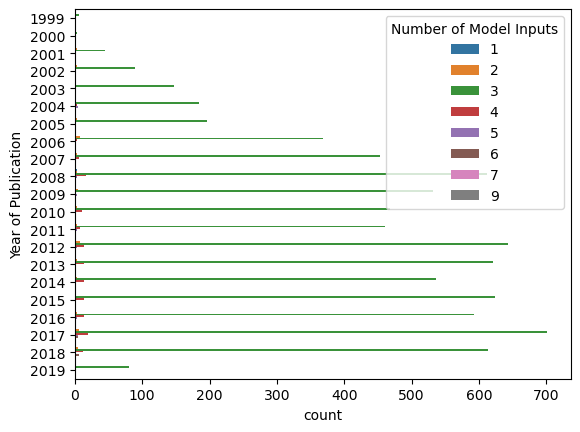

In [63]:
sns.countplot(y='Year of Publication', hue='Number of Model Inputs', data=df)

In [64]:
df['Top-N Facts'] = df['qa'].apply(lambda x: x['tfidftopn'])
df['Number of Top-N Facts'] = df['Top-N Facts'].apply(lambda x: dict_length(x)).astype(int)
df.head()

pre_text  \
0  [interest rate to a variable interest rate bas...   
1  [abiomed , inc ., and subsidiaries notes to co...   
2  [the following table shows annual aircraft fue...   
3  [the fair value of our grants receivable is de...   
4  [entergy louisiana , llc management's financia...   

                                           post_text  \
0  [fair value of forward exchange contracts afte...   
1  [the remaining unrecognized compensation expen...   
2  [as of december 31 , 2018 , we did not have an...   
3  [in the third quarter of 2013 , we sold our sh...   
4  [the retail electric price variance is primari...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  ...  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI  ...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD  ...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL  ...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC  ...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR  ...   

                              Operations  Number of Operations  \
0                         divide, divide                     2   
1  multiply, multiply, multiply, greater                     4   
2                                 divide                     1   
3                                 divide                     1   
4                       subtract, divide                     2   

                                    Supporting Facts  Number of Facts  \
0  {'text_1': 'if libor changes by 100 basis poin...                1   
1  {'table_2': 'the granted of number of shares (...                2   
2  {'table_1': 'year the 2018 of gallons is 4447 ...                1   
3  {'table_1': '( in millions ) the available-for...                2   
4  {'table_1': 'the 2007 net revenue of amount ( ...                2   

  Rows from Text or Table  Text or Table  \
0                  text

In [65]:
number_of_topn_facts_value_counts = round(df['Number of Top-N Facts'].value_counts(ascending = True),2)
pie_data = pd.DataFrame({'Number of Top-N Facts': number_of_topn_facts_value_counts.index,
                         'Number': number_of_topn_facts_value_counts.values})

fig = px.pie(pie_data, values = 'Number', names = 'Number of Top-N Facts', 
             title='Percentage Distribution of the Number of Top-N Facts required to answer the Financial Question')
fig.show()

<Axes: xlabel='count', ylabel='Year of Publication'>

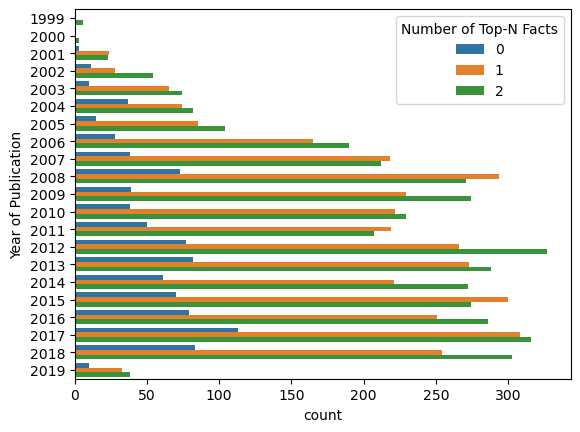

In [66]:
sns.countplot(y='Year of Publication', hue='Number of Top-N Facts', data=df)

In [67]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\somil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\somil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z0-9]", " ", str(raw_text))
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'lemma'):
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    else:
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [69]:
df['pre_text'] = df['pre_text'].apply(str)
df['post_text'] = df['post_text'].apply(str)

In [70]:
# Saving the Original Pre Text and Post Text Column for Prompt Modelling

dh = pd.DataFrame(df,columns=['pre_text', 'post_text'])

In [71]:
df['pre_text'] = df['pre_text'].apply(lambda x: preprocess(x,'lemma'))
df['post_text'] = df['post_text'].apply(lambda x: preprocess(x,'lemma'))

In [72]:
# !pip install wordcloud

In [73]:
from wordcloud import WordCloud
from IPython.display import display
import string

In [74]:
def generate_wordcloud(x):
    words = ' '.join(x)
    wordcloud = WordCloud(stopwords=stopwords.words("english"), background_color='white', width = 1600, 
                          height=800).generate(words)
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

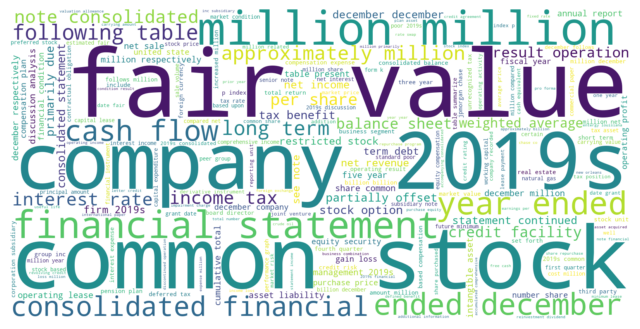

In [75]:
generate_wordcloud(df['pre_text'])

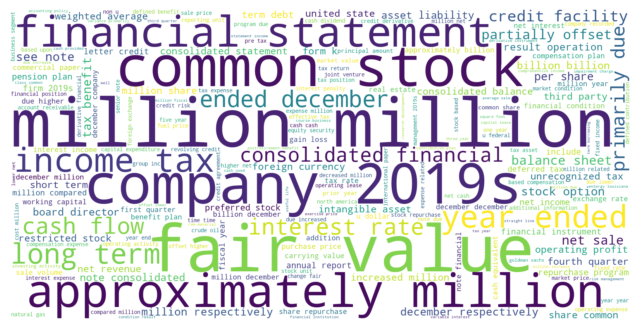

In [76]:
generate_wordcloud(df['post_text'])

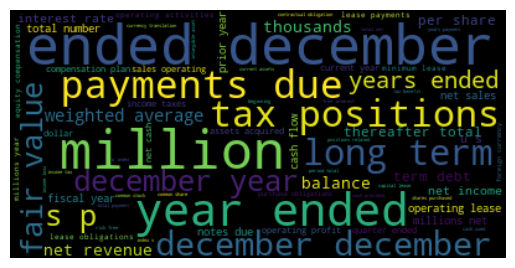

In [77]:
text = ' '.join(' '.join(row) for row in (cell for row in (table for table in df['table']) for cell in row))
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

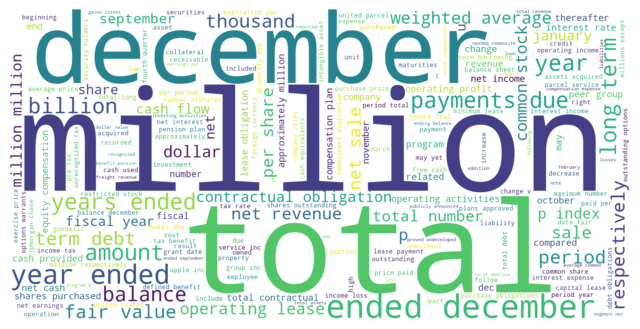

In [78]:
df['Supporting Facts'] = df['Supporting Facts'].apply(lambda x: ', '.join(x.values()))
generate_wordcloud(df['Supporting Facts'])

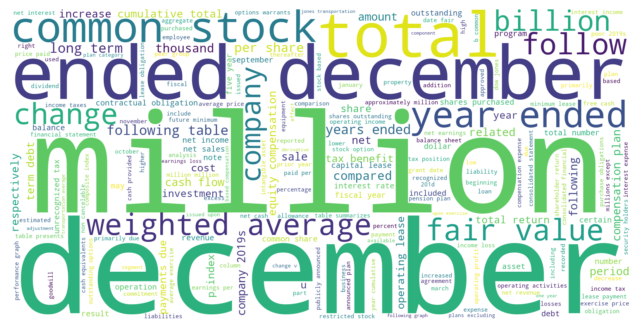

In [79]:
df['Top-N Facts'] = df['Top-N Facts'].apply(lambda x: ', '.join(x.values()))
generate_wordcloud(df['Top-N Facts'])

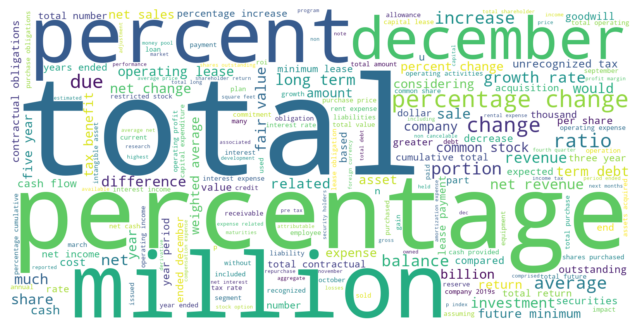

In [80]:
df['Question'] = df['qa'].apply(lambda x: x['question'])
generate_wordcloud(df['Question'])

In [81]:
words_per_sentence = [len(word_tokenize(sentence)) for sentence in df['Question']]

# Calculate the average sentence length
average_question_length = sum(words_per_sentence) / len(words_per_sentence)

# Print the average sentence length
print("Average Questions Length:", round(average_question_length,2))

Average Questions Length: 17.48


In [82]:
words_per_sentence = [len(word_tokenize(sentence)) for sentence in df['pre_text']]

# Calculate the average sentence length
average_pretext_length = sum(words_per_sentence) / len(words_per_sentence)

# Print the average sentence length
print("Average Pre-Text Length:", round(average_pretext_length,2))

Average Pre-Text Length: 176.08


In [83]:
words_per_sentence = [len(word_tokenize(sentence)) for sentence in df['post_text']]

# Calculate the average sentence length
average_posttext_length = sum(words_per_sentence) / len(words_per_sentence)

# Print the average sentence length
print("Average Post-Text Length:", round(average_posttext_length,2))

Average Post-Text Length: 189.91


<Axes: xlabel='count', ylabel='Year of Publication'>

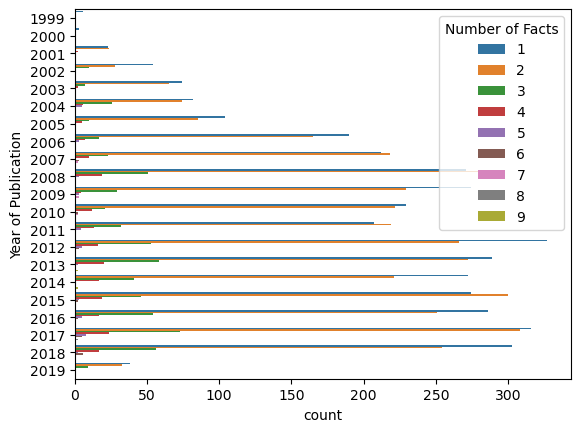

In [84]:
sns.countplot(y='Year of Publication', hue='Number of Facts', data=df)

In [85]:
sentence_pattern = r"[^.!?]+[.!?]"

def count_sentences(explanation):
    sentences = re.findall(sentence_pattern, explanation)
    return len(sentences)

In [86]:
df['Explanations'] = df['qa'].apply(lambda x: x['explanation'])

In [87]:
total_sentences = 0
    
# Iterate over each explanation in the dictionary
for key, explanation in df['qa'].items():
    # Tokenize the explanation into sentences
    sentences = nltk.sent_tokenize(str(df['Explanations']))
    # Get the number of sentences
    num_sentences = len(sentences)
    # Store the count in the num_explanations dictionary
    total_sentences += num_sentences

# Add the "Number of Explanations" column to the dictionary
df['qa']["Number of Explanations"] = total_sentences

In [88]:
df.head()

pre_text  \
0  interest rate variable interest rate based thr...   
1  abiomed inc subsidiary note consolidated finan...   
2  following table show annual aircraft fuel cons...   
3  fair value grant receivable determined using d...   
4  entergy louisiana llc management financial dis...   

                                           post_text  \
0  fair value forward exchange contract 10 10 unf...   
1  remaining unrecognized compensation expense ou...   
2  december 31 2018 fuel hedging contract outstan...   
3  third quarter 2013 sold share clearwire corpor...   
4  retail electric price variance primarily due c...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  ...  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI  ...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD  ...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL  ...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC  ...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR  ...   

                                    Supporting Facts  Number of Facts  \
0  if libor changes by 100 basis points , our ann...                1   
1  the granted of number of shares ( in thousands...                2   
2  year the 2018 of gallons is 4447 ; the 2018 of...                1   
3  ( in millions ) the available-for-sale investm...                2   
4  the 2007 net revenue of amount ( in millions )...                2   

  Rows from Text or Table  Text or Table  \
0                  text_1           text   
1         table_2,text_15     table,text   
2                 table_1          table   
3         table_1,table_8    table,table   
4         table_1,table_6    table,table   

                                         Model Input  Number of Model Inputs  \
0  [[text_0, interest rate to a variable interest...                       3   
1  [[table_2, the granted of number of 

In [89]:
number_of_explanations_value_counts_normalized = round(df['Explanations'].str.split(',').str.len().
                                                     value_counts(ascending = False, normalize = True)* 100,2)
number_of_explanations_value_counts_normalized

1     96.44
2      2.95
3      0.53
4      0.06
10     0.01
5      0.01
Name: Explanations, dtype: float64

In [90]:
pie_data = pd.DataFrame({'Number of Explanations': number_of_explanations_value_counts_normalized.index,
                         'Number': number_of_explanations_value_counts_normalized.values})

fig = px.pie(pie_data, values = 'Number', names = 'Number of Explanations', 
             title='Percentage Distribution of the Number of Explanations generated after answering the Financial Question')
fig.show()

In [91]:
# Extract the Answer from the QA Column

df['Answer'] = df['qa'].apply(lambda x: x['answer'])
df.head()

pre_text  \
0  interest rate variable interest rate based thr...   
1  abiomed inc subsidiary note consolidated finan...   
2  following table show annual aircraft fuel cons...   
3  fair value grant receivable determined using d...   
4  entergy louisiana llc management financial dis...   

                                           post_text  \
0  fair value forward exchange contract 10 10 unf...   
1  remaining unrecognized compensation expense ou...   
2  december 31 2018 fuel hedging contract outstan...   
3  third quarter 2013 sold share clearwire corpor...   
4  retail electric price variance primarily due c...   

                                           table_ori  \
0  [[, October 31, 2009, November 1, 2008], [Fair...   
1  [[, Number of Shares (in thousands), Weighted ...   
2  [[Year, Gallons, Average Priceper Gallon, Airc...   
3  [[(In Millions), Dec 28,2013, Dec 29,2012], [A...   
4  [[, Amount (In Millions)], [2007 net revenue, ...   

                                               table  \
0  [[, october 31 2009, november 1 2008], [fair v...   
1  [[, number of shares ( in thousands ), weighte...   
2  [[year, gallons, average priceper gallon, airc...   
3  [[( in millions ), dec 282013, dec 292012], [a...   
4  [[, amount ( in millions )], [2007 net revenue...   

                                                  qa  \
0  {'question': 'what is the the interest expense...   
1  {'question': 'during the 2012 year , did the e...   
2  {'question': 'what was the total operating exp...   
3  {'question': 'what percentage of total cash an...   
4  {'question': 'what is the growth rate in net r...   

                                     table_retrieved  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1   [{'score': 1.944458127021789, 'ind': 'table_2'}]   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                      text_retrieved  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2'}]   

                                 table_retrieved_all  \
0  [{'score': -0.620767951011657, 'ind': 'table_1...   
1  [{'score': 1.944458127021789, 'ind': 'table_2'...   
2  [{'score': 1.610554456710815, 'ind': 'table_1'...   
3  [{'score': 2.993736505508423, 'ind': 'table_8'...   
4  [{'score': 3.095985174179077, 'ind': 'table_6'...   

                                  text_retrieved_all Company Name  ...  \
0  [{'score': 1.251369595527649, 'ind': 'text_1'}...          ADI  ...   
1  [{'score': 1.8354555368423462, 'ind': 'text_15...         ABMD  ...   
2  [{'score': -1.6479225158691402, 'ind': 'text_9...          AAL  ...   
3  [{'score': -2.141725540161133, 'ind': 'text_9'...         INTC  ...   
4  [{'score': -0.5041980147361751, 'ind': 'text_2...          ETR  ...   

   Number of Facts  Rows from Text or Table Text or Table  \
0                1                   text_1          text   
1                2          table_2,text_15    table,text   
2                1                  table_1         table   
3                2          table_1,table_8   table,table   
4                2          table_1,table_6   table,table   

                                         Model Input Number of Model Inputs  \
0  [[text_0, interest rate to a variable interest...                      3   
1  [[table_2, the granted of number of shares ( i...                      3   
2  [[table_1, year the 2018 of gallons is 4447 ; ...                      3   
3  [[table_1, ( in millions ) the available-for-s...                      3   
4  [[table_1, the 2007 net revenue of amount ( in...                      3   

                                         Top-N Facts Number o

In [92]:
df.columns

Index(['pre_text', 'post_text', 'table_ori', 'table', 'qa', 'table_retrieved',
       'text_retrieved', 'table_retrieved_all', 'text_retrieved_all',
       'Company Name', 'Year of Publication', 'Page_Number', 'Operations',
       'Number of Operations', 'Supporting Facts', 'Number of Facts',
       'Rows from Text or Table', 'Text or Table', 'Model Input',
       'Number of Model Inputs', 'Top-N Facts', 'Number of Top-N Facts',
       'Question', 'Explanations', 'Answer'],
      dtype='object')

In [93]:
df.to_excel("DataFrame.xlsx")

In [94]:
dh.to_excel("PrePost_Column_Data.xlsx")